# 3. Are Brainsense (LFP) and LeadDBS(Neuroimage) correlated?

This is the third Notebook that has to be runned. In this one the correlation between electrode leads selected via LFP recordings and those selected with neuroimaging si studied.

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, kruskal
from scipy.stats import shapiro, anderson
import scipy.stats as stats
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
df_e = pd.read_csv('/home/razkinm/projects/6articulodbs/derivates/df_preprocessed.csv', sep=',')

## Contingency tables

### Right hemisphere

Chi-cuadrado: 43.66248109998111
p-valor: 7.539494102505298e-09
Grados de libertad: 4
Frecuencias esperadas: [[ 1.86440678  8.94915254  9.69491525  0.74576271  0.74576271]
 [ 3.13559322 15.05084746 16.30508475  1.25423729  1.25423729]]

Existe una asociación significativa entre los contactos elegidos por BrainSense y los contactos identificados por LeadDBS.


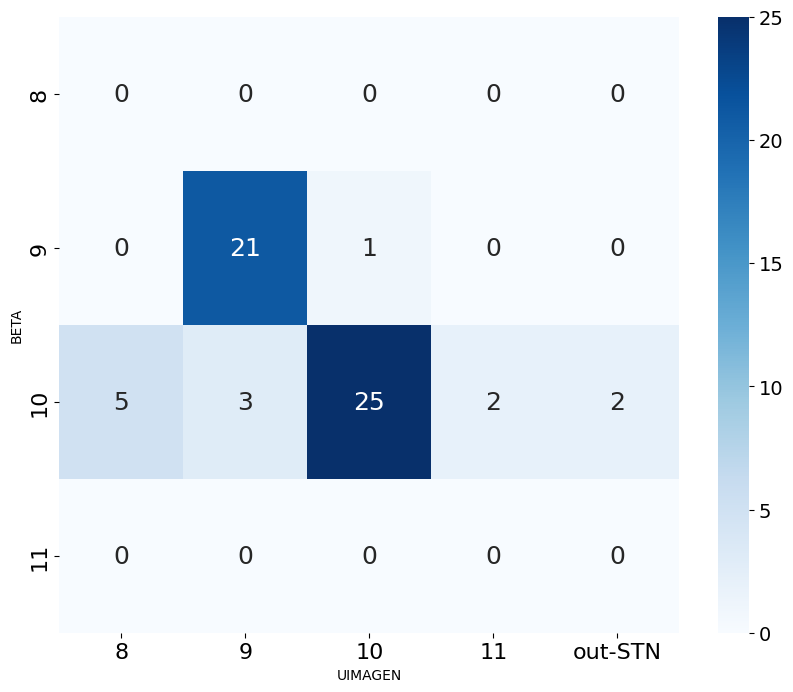

In [ ]:
# reate a contingency table
contingency_table = pd.crosstab(df_e['BETA'], df_e['UIMAGEN'])
columns = contingency_table.columns
contingency_table = contingency_table.drop(columns=[0,1,2,3])
contingency_table = contingency_table.drop(index=[1,2])
contingency_table = contingency_table.rename(columns={14: 'out-STN'})


# Chi2 test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Grados de libertad: {dof}")
print(f"Frecuencias esperadas: {expected}")
if p < 0.05:
    print("\nExiste una asociación significativa entre los contactos elegidos por BrainSense y los contactos identificados por LeadDBS.")
else:
    print("\nNo existe una asociación significativa entre los contactos elegidos por BrainSense y los contactos identificados por LeadDBS.")

index_vals = [8, 9, 10, 11]
columns_vals = [8, 9, 10, 11, 'out-STN']
contingency_table = contingency_table.reindex(index=index_vals, columns=columns_vals, fill_value=0)


# Visualize the table
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues",
            annot_kws={"size": 18})  
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = plt.gcf().axes[-1]
cbar.yaxis.label.set_size(16)
cbar.tick_params(labelsize=14)
# save image as a svg file
plt.savefig('contingency_right.svg', dpi=300, format='svg')
plt.show()

### Left Hemisphere

Chi-cuadrado: 24.89777084705753
p-valor: 5.27477632656624e-05
Grados de libertad: 4
Frecuencias esperadas: [[ 2.71186441 11.93220339 12.47457627  0.54237288  4.33898305]
 [ 2.28813559 10.06779661 10.52542373  0.45762712  3.66101695]]

Existe una asociación significativa entre los contactos elegidos por BrainSense y los contactos identificados por LeadDBS.


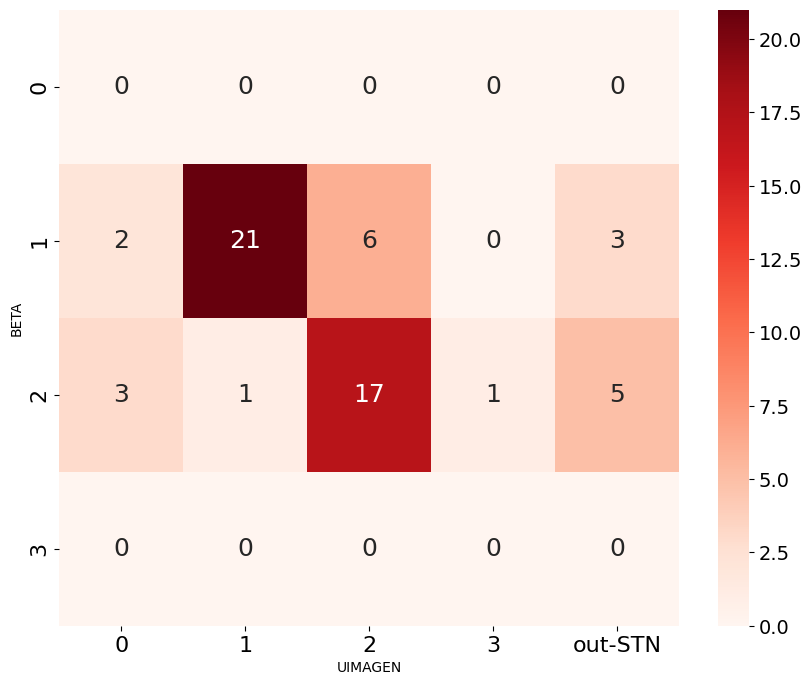

In [ ]:
contingency_table = pd.crosstab(df_e['BETA'], df_e['UIMAGEN'])
contingency_table = contingency_table.drop(columns=[8,9,10,11])
contingency_table = contingency_table.drop(index=[9,10])
contingency_table = contingency_table.rename(columns={14: 'out-STN'})


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Grados de libertad: {dof}")
print(f"Frecuencias esperadas: {expected}")
if p < 0.05:
    print("\nExiste una asociación significativa entre los contactos elegidos por BrainSense y los contactos identificados por LeadDBS.")
else:
    print("\nNo existe una asociación significativa entre los contactos elegidos por BrainSense y los contactos identificados por LeadDBS.")

index_vals = [0, 1, 2, 3]
columns_vals = [0, 1, 2, 3, 'out-STN']
contingency_table = contingency_table.reindex(index=index_vals, columns=columns_vals, fill_value=0)


# Visualize
plt.figure(figsize=(10, 8))

sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Reds", 
            annot_kws={"size": 18})  
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

cbar = plt.gcf().axes[-1]
cbar.yaxis.label.set_size(16)
cbar.tick_params(labelsize=14)
plt.savefig('contingency_left.svg', dpi=300, format='svg')
plt.show()